In [2]:
%matplotlib inline 
#有了matplotlib inline 就可以省掉plt.show()了
%load_ext autoreload
%autoreload 2

from __future__ import division
from imports import *
#import pylab #使用pylab模式，可以直接使用numpy、pandas和绘图，而不需要再次引入,会配置为使用你所指定的matplotlib gui后端，还会提供一种更接近于matlab的界面
#%pylab
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();">Toggle code</button>""", raw=True)
# 允许多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Toggle code

## 数据预处理
1. 数据的准备
2. 数据的转换
3. 数据的输出

#### 在模型训练之前，必须进行数据预处理。
#### <span style='color:red'>不同的算法对数据有不同的假定，需要按照不同的方式转换数据</span>

#### 数据处理的流程
1. 导入数据
2. 按照算法的输入和输出整理数据
3. 格式化输入数据
4. 总结显示数据的变化


用scikit-learn 的fit and multiple transform方法：  
1. 调用fit（）函数来准备数据转换的参数
2. 调用transform（）函数来做数据的预处理
combined Fit-and-Transform对绘图或汇总处理具有非常好的效果

#### 调整数据尺度
将数据的所有属性标准化，并将数据转换为0和1之间的值  
在统计学中，按照对事物描述的精准度，对所采用的尺度从低级到高级分成四个层次：  
1. 定类尺度：对事物类别属性的一种测度，按照事物的属性进行分组或分类
2. 定序尺度：对事物之间的等级或顺序的一种测度，可以比较优劣或排序  
3. 定距尺度：对事物类别或次序之间间距的测量，不仅能将事物区分为不同的类型并进行排序，而且可以准确地之处类别之间的差距
4. 定比尺度：类似定距尺度，但是可以有一个固定的绝对“零”点

在scikit-learn中，可以通过MinMaxScaler类来调整数据尺度。这个方法将属性缩放到一个指定的范围，或者对数据进行标准化并将数据都聚集到0附件，方差为1

In [90]:
filename = './csvs/user_label_30day_0301.csv'
filename2 = './csvs/30-dfqp-detail.csv'
dataset = pd.read_csv(filename)
dataset2 = pd.read_csv(filename2)
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
dataset.head(10)
dataset2.head(10)
dataset = dataset[dataset['user_label_30day.fgamename']=='地方棋牌']
data = pd.merge(dataset,dataset2,left_on='user_label_30day.fuid',right_on='a.mid')
#data = data[data.dtypes=='int64']
array = data.values
X = array[:,5:9].astype(np.int32)
Y = array[:,9].astype(np.int32)
transformer = MinMaxScaler(feature_range=(0,1))
newX = transformer.fit_transform(X)
set_printoptions(precision=3)
print(newX)

,user_label_30day.fgamefsk,user_label_30day.fgamename,user_label_30day.fplatformfsk,user_label_30day.fplatformname,user_label_30day.fuid,user_label_30day.play_passion,user_label_30day.play_days,user_label_30day.play_duration,user_label_30day.play_innings,user_label_30day.pay_passion,user_label_30day.pay_sum,user_label_30day.pay_sum_usd,user_label_30day.pay_count,user_label_30day.match_passion,user_label_30day.match_duration,user_label_30day.match_innings,user_label_30day.dt
0,1396894,德州扑克,106200515,FB波兰,87629011,25,11,16511,368,0,0.0,0.0,0,0,0,0,2018-03-01
1,1396895,斗地主,58930167,简体,71338613,24,13,15223,201,0,0.0,0.0,0,0,0,0,2018-03-01
2,70000050,大厅博定,77000025,泰语,13789107,7,2,1229,24,0,0.0,0.0,0,0,0,0,2018-03-01
3,1396894,德州扑克,60321409,新浪平台,247910182,14,1,7103,116,0,0.0,0.0,0,0,0,0,2018-03-01
4,1396902,麻将,4504940387,麻将全集,8095873,21,3,11533,76,0,0.0,0.0,0,0,0,0,2018-03-01
5,12151481,中国象棋,58930167,简体,18126933,58,21,98585,184,0,0.0,0.0,0,0,0,0,2018-03-01
6,1396895,斗地主,58930167,简体,151942870,81,30,74115,869,0,0.0,0.0,0,0,0,0,2018-03-01
7,1396895,斗地主,58930170,繁体,177613,1,1,643,9,0,0.0,0.0,0,0,0,0,2018-03-01
8,4542620389,海外棋牌,4619040443,泰国,13842960,23,13,1378,61,0,0.0,0.0,0,0,0,0,2018-03-01
9,70000007,多米诺,4135524968,移动印尼,7771859,15,5,5930,162,0,0.0,0.0,0,3,1832,49,2018-03-01


,a.mid,a.nickname,a.signup_time,a.latest_login_time,a.lifespan,a.signup_to_now_days,a.signup_channel_code,a.signup_device_type,a.signup_device_pixel,a.signup_device_imei,...,a.fgamefsk,a.fgamename,a.fplatformfsk,a.fplatformname,a.fhallfsk,a.fhallname,a.fterminaltypefsk,a.fterminaltypename,a.fversionfsk,a.fversionname
0,41663.0,老李不咋地,2015-07-13 08:50:13,2018-06-05 13:52:42,1059.0,1078.0,-13658.0,NaN,NaN,460014158074238,...,4.132314e+09,地方棋牌,77000192.0,辽宁,800013.0,大连大厅,600001.0,IOS,4.620471e+09,IPHONE
1,75081.0,花,2015-07-25 10:24:49,2018-05-03 23:30:41,1014.0,1066.0,-13658.0,NaN,NaN,460023123517559,...,4.132314e+09,地方棋牌,77000202.0,四川,800005.0,宜宾大厅,600006.0,ANDROID,4.620471e+09,主版本
2,651744.0,周星星,2016-06-11 12:27:56,2018-03-25 21:21:46,653.0,744.0,114595.0,iPhone,1136*640,-13658,...,4.132314e+09,地方棋牌,77000202.0,四川,800001.0,四川大厅,600001.0,IOS,4.620471e+09,IPHONE
3,697023.0,@.~,2016-01-17 15:16:49,2018-06-24 19:14:48,890.0,890.0,-13658.0,iPhone,1136*640,NaN,...,4.132314e+09,地方棋牌,77000202.0,四川,800000.0,自贡大厅,600001.0,IOS,4.620471e+09,IPHONE
4,958284.0,梦昵洋房,2016-03-16 18:08:12,2018-06-24 08:00:12,831.0,831.0,113597.0,vivo Y13L,854*480,460008564926224,...,4.132314e+09,地方棋牌,77000192.0,辽宁,800013.0,大连大厅,600006.0,ANDROID,4.620471e+09,主版本
5,1347848.0,枫舞联铰子,2016-05-22 21:42:38,2018-02-02 21:11:13,622.0,764.0,114595.0,SM-G9280,1920*1080,460029841653592,...,4.132314e+09,地方棋牌,77000202.0,四川,800000.0,自贡大厅,600006.0,ANDROID,4.620471e+09,主版本
6,1438406.0,炽火晴之妖妖,2016-06-08 11:14:48,2018-06-24 11:33:39,747.0,747.0,113597.0,Redmi Note 2,1920*1080,460014692441522,...,4.132314e+09,地方棋牌,77000192.0,辽宁,800013.0,大连大厅,600006.0,ANDROID,4.620471e+09,主版本
7,2572335.0,iPhone,2016-03-21 09:38:06,2018-06-24 22:34:20,826.0,826.0,NaN,NaN,NaN,NaN,...,4.132314e+09,地方棋牌,77000202.0,四川,800001.0,四川大厅,600001.0,IOS,4.620471e+09,IPHONE
8,2727243.0,？飞机,2016-07-20 04:33:31,2018-05-23 17:34:31,673.0,705.0,NaN,NaN,NaN,NaN,...,4.132314e+09,地方棋牌,77000202.0,四川,800009.0,乐山大厅,600006.0,ANDROID,4.620471e+09,主版本
9,3296955.0,柒柒,2016-08-04 11:27:59,2018-06-24 20:19:45,690.0,690.0,-13658.0,iPhone,1136*640,7b277b7f29bc2fd718e51f65b8d1216f,...,4.132314e+09,地方棋牌,77000192.0,辽宁,800013.0,大连大厅,600001.0,IOS,4.620471e+09,IPHONE


[[ 0.04   0.069  0.004  0.002]
 [ 0.152  0.345  0.005  0.011]
 [ 0.131  0.207  0.009  0.024]
 ..., 
 [ 0.354  0.759  0.031  0.02 ]
 [ 0.061  0.069  0.008  0.01 ]
 [ 0.293  0.172  0.092  0.031]]


#### 正态化数据（Standardize Data）
通过scikit-learn里面的StandardScaler类来进行正态化

In [9]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
newX = transformer.transform(X)
print(newX)

[[-0.775 -0.571]
 [ 1.117  1.622]
 [-0.685 -0.267]
 ..., 
 [-0.865 -0.642]
 [-0.099 -0.088]
 [ 2.334  0.807]]


#### 标准化数据（Normalize Data）
将每一行的数据的距离处理成1的数据，又叫做“归一元”处理  
适合处理稀疏数据（具有很多为0的数据）  
scikit-learn中的Normalizer类实现

In [12]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
newX = transformer.transform(X)
print(newX)

[[ 0.006  1.   ]
 [ 0.005  1.   ]
 [ 0.003  1.   ]
 ..., 
 [ 0.005  1.   ]
 [ 0.007  1.   ]
 [ 0.012  1.   ]]


#### 二值数据（Binarize Data）
是使用值将数据转换为二值，大于阈值设置为1，小于阈值设置为0.  
使用scikit-learn中的Binarizer类实现

In [14]:
from sklearn.preprocessing import Binarizer
transformer = Binarizer(threshold=5.0).fit(X)
newX = transformer.transform(X)
print(newX)

[[ 0.  1.]
 [ 1.  1.]
 [ 0.  1.]
 ..., 
 [ 0.  1.]
 [ 1.  1.]
 [ 1.  1.]]


## 数据特征选定

#### 特征选定
优点：
1. 降低数据的拟合度
2. 提高算法精度
3. 减少训练时间

#### 单变量特征选定
scikit-learn中使用SelectKBest类，可以使用一系列统计方法来选定数据特征。  
卡方值越大，说明偏离程度越大，越不符合  
反之，卡方值越小，偏差越小，越趋于符合  
若两个值完全相等，卡方值为0，则完全符合

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dataset.head(10)
newX
test = SelectKBest(score_func=chi2,k='all')
fit = test.fit(newX,Y)
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(newX)
print(features)

,user_label_30day.fgamefsk,user_label_30day.fgamename,user_label_30day.fplatformfsk,user_label_30day.fplatformname,user_label_30day.fuid,user_label_30day.play_passion,user_label_30day.play_days,user_label_30day.play_duration,user_label_30day.play_innings,user_label_30day.pay_passion,user_label_30day.pay_sum,user_label_30day.pay_sum_usd,user_label_30day.pay_count,user_label_30day.match_passion,user_label_30day.match_duration,user_label_30day.match_innings,user_label_30day.dt
13,4132314431,地方棋牌,77000210,山东,7738292,90,30,198660,2550,0,0.0,0.0,0,49,19170,261,2018-03-01
51,4132314431,地方棋牌,77000202,四川,15685099,5,3,3566,30,0,0.0,0.0,0,0,0,0,2018-03-01
64,4132314431,地方棋牌,77000202,四川,18994658,16,11,4712,149,0,0.0,0.0,0,0,0,0,2018-03-01
65,4132314431,地方棋牌,77000204,云南,20342631,14,7,9223,317,10,4.5,0.7,3,0,0,0,2018-03-01
71,4132314431,地方棋牌,77000192,辽宁,576312,22,13,37829,126,0,0.0,0.0,0,0,0,0,2018-03-01
78,4132314431,地方棋牌,77000210,山东,20291684,1,1,466,1,0,0.0,0.0,0,0,0,0,2018-03-01
113,4132314431,地方棋牌,77000192,辽宁,20375534,2,2,333,3,0,0.0,0.0,0,0,0,0,2018-03-01
120,4132314431,地方棋牌,77000192,辽宁,3819497,34,21,40363,513,0,0.0,0.0,0,24,13065,159,2018-03-01
128,4132314431,地方棋牌,77000204,云南,17197133,23,13,8203,145,0,0.0,0.0,0,0,0,0,2018-03-01
136,4132314431,地方棋牌,77000204,云南,19769956,39,20,24197,146,0,0.0,0.0,0,0,0,0,2018-03-01


array([[ 0.04 ,  0.069,  0.004,  0.002],
       [ 0.152,  0.345,  0.005,  0.011],
       [ 0.131,  0.207,  0.009,  0.024],
       ..., 
       [ 0.354,  0.759,  0.031,  0.02 ],
       [ 0.061,  0.069,  0.008,  0.01 ],
       [ 0.293,  0.172,  0.092,  0.031]])

[ 166.082  129.766   63.635  131.064]
[[ 0.04   0.069  0.004  0.002]
 [ 0.152  0.345  0.005  0.011]
 [ 0.131  0.207  0.009  0.024]
 ..., 
 [ 0.354  0.759  0.031  0.02 ]
 [ 0.061  0.069  0.008  0.01 ]
 [ 0.293  0.172  0.092  0.031]]


### 递归特征消除（RFE）
使用一个基模型来进行多轮训练，每轮训练后消除若干权值系数的特征，再基于新的特征集进行下一轮训练。通过每一个基模型的精度，找到对最终的预测结果影响最大的数据特征。

In [77]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model,3)
fit = rfe.fit(newX,Y)
#print("特征个数：",fit.n_features_)
print("被选定的特征：")
print(fit.support_)
print("特征排名：")
print(fit.ranking_)

被选定的特征：
[ True  True False  True]
特征排名：
[1 1 2 1]


### 主成分分析（PCA）
使用线性代数来转换压缩数据，通常被称作数据降维。是一种无监督的降维方法
#### PCA的思想
找出数据里最主要的方面，用数据里最主要的方面来代替原始数据。  
比如二维降低到一维，是要找到样本点在这个维度方向距离最短的，还有就是样本点在这个直线上的投影足够分散

#### scikit-learn PCA类
最常用的是sklearn.decomposition.PCA 
基本不需要调参，主要参数：  
1. n_components:指定希望PCA降维后的特征维度数目，可以直接指定为一个数字
2. whiten:是否进行白化。即对降维后的数据的每个特征进行归一化
3. svd_solver: 一般来说，选默认值就行


[  2.881e+09   1.134e+05   1.899e+02   3.997e+00]
解释方差：[  1.000e+00   3.936e-05   6.589e-08   1.387e-09]
[[  3.721e-04   1.207e-04   1.000e+00   7.784e-03]
 [  1.097e-02   4.186e-03  -7.788e-03   9.999e-01]
 [ -8.918e-01  -4.522e-01   2.955e-04   1.168e-02]
 [ -4.522e-01   8.919e-01   5.103e-05   1.229e-03]]


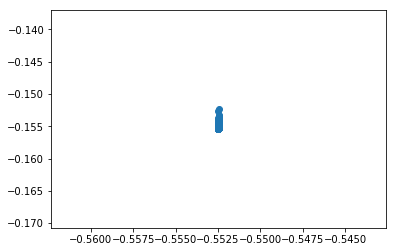

In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4,whiten=True)
fit = pca.fit(X)
X_new = fit.transform(newX)
#plt.scatter(X_new[:,0],X_new[:,1],marker='o')
print fit.explained_variance_ # 代表降维后的各主成分的方差值，方差值越大，是重要的主成分
print("解释方差：%s"% fit.explained_variance_ratio_) # 代表降维后的各主成分的方差值占总方差值得比例，比例越大，则越是重要的主成分
print(fit.components_)

### 特征重要性
袋装决策树算法（bagged Decision Trees）  
随机森林算法  
极端随机数算法  


In [88]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
fit = model.fit(X,Y)
fit.feature_importances_

array([ 0.173,  0.114,  0.354,  0.359])